In [2]:
# importing pandas
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np


In [3]:
# Read the CSV file
police_file = ("/Users/jnellniz/Desktop/Police_Incidents_2023.csv")
df = pd.read_csv(police_file)

In [4]:
new_df = df[['publicaddress', 'caseNumber', 'precinct', 'reportedDate', 'reportedDateTime',
             'offense', 'description', 'centerLong', 'centerLat', 'centerX', 'centerY', 'neighborhood',]]

autoth_df = new_df.loc[new_df["offense"] == "AUTOTH"]
autoth_df = autoth_df.reset_index(drop= False, names= 'id')

autoth_df.to_csv('autoth_dataframe.csv', index=False)

# Load the data into autoth_df DataFrame

autoth_df = pd.read_csv('autoth_dataframe.csv')

# Filter and count for each precinct
precincts = ["1", "2", "3", "4", "5"]
counts = []
max_neighborhoods = []

for precinct in precincts:
    count_precinct = autoth_df[autoth_df["precinct"] == precinct]
    max_precinct = count_precinct["neighborhood"].value_counts()
    max_precinct_count = max_precinct.max()
    ind_count_precinct = count_precinct["precinct"].count()
    
    counts.append(ind_count_precinct)
    max_neighborhoods.append(max_precinct)
    
    print(f"count of precinct {precinct} is {ind_count_precinct}")
    print(f"with the neighborhood breakdown of {max_precinct}")
    
# Create a DataFrame with precinct counts
ydf = pd.Series(counts, index=precincts)

# Extract reported dates for each precinct
date_precincts = []

for precinct in precincts:
    date_precinct = autoth_df[autoth_df["precinct"] == precinct]
    date_precinct["reportedDate"] = pd.to_datetime(date_precinct["reportedDate"])  # Convert to datetime format
    date_precinct = date_precinct.set_index("reportedDate")  # Set the reportedDate as the index
    date_precinct = pd.DataFrame(date_precinct)
    
    date_precincts.append(date_precinct)
    
    print(f"{date_precinct}")
    
# Resample reported dates by week for each precinct
df_scatter = pd.DataFrame()

for i, date_precinct in enumerate(date_precincts):
    resampled_dates = date_precinct.resample("W").size()  # No need to specify 'on' parameter with the index set
    df_scatter[f"precinct {precincts[i]}"] = resampled_dates
    
# Plotly visualization
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_scatter.index,
                         y=df_scatter[df_scatter.columns[0]],
                         visible=True))

updatemenu = []
buttons = []

for col in df_scatter.columns:
    buttons.append(dict(method='restyle',
                        label=col,
                        visible=True,
                        args=[{'y':[df_scatter[col]],
                               'x':[df_scatter.index],
                               'type':'scatter'}, [0]],
                        ))

updatemenu.append(dict(buttons=buttons,
                       direction='down',
                       showactive=True))

fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()

count of precinct 1 is 765
with the neighborhood breakdown of neighborhood
Cedar Riverside    187
Downtown West      172
Loring Park        149
Elliot Park        119
North Loop          96
Downtown East       42
Name: count, dtype: int64
count of precinct 2 is 1275
with the neighborhood breakdown of neighborhood
Marcy Holmes                       280
Prospect Park - East River Road    146
Holland                            101
Como                                80
Windom Park                         74
Logan Park                          74
St. Anthony West                    73
Sheridan                            71
Audubon Park                        54
St. Anthony East                    45
Waite Park                          42
Northeast Park                      41
Bottineau                           36
Marshall Terrace                    35
Beltrami                            33
Mid - City Industrial               31
Nicollet Island - East Bank         25
Columbia Park         

/var/folders/85/6tdhkxk153777zn2r6tvcv700000gn/T/ipykernel_46425/148746129.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_precinct["reportedDate"] = pd.to_datetime(date_precinct["reportedDate"])  # Convert to datetime format
/var/folders/85/6tdhkxk153777zn2r6tvcv700000gn/T/ipykernel_46425/148746129.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_precinct["reportedDate"] = pd.to_datetime(date_precinct["reportedDate"])  # Convert to datetime format
/var/folders/85/6tdhkxk153777zn2r6tvcv70

In [9]:
# Load the data into autoth_df DataFrame

# Assuming autoth_df is loaded from a CSV file
autoth_df = pd.read_csv('autoth_dataframe.csv')

# Filter and count for each precinct
precincts = ["1", "2", "3", "4", "5"]
counts = []

for precinct in precincts:
    count_precinct = autoth_df[autoth_df["precinct"] == precinct]
    ind_count_precinct = count_precinct["precinct"].count()

    counts.append(ind_count_precinct)

    print(f"count of precinct {precinct} is {ind_count_precinct}")

# Create a DataFrame with precinct counts
ydf = pd.Series(counts, index=precincts)

# Extract reported dates for each precinct
date_precincts = []

for precinct in precincts:
    date_precinct = autoth_df[autoth_df["precinct"] == precinct]
    date_precinct["reportedDate"] = pd.to_datetime(date_precinct["reportedDate"])  # Convert to datetime format
    date_precinct = date_precinct.set_index("reportedDate")  # Set the reportedDate as the index
    date_precinct = pd.DataFrame(date_precinct)

    date_precincts.append(date_precinct)

    print(f"{date_precinct}")

# Resample reported dates by week for each precinct
df_line = pd.DataFrame()

for i, date_precinct in enumerate(date_precincts):
    resampled_dates = date_precinct.resample("W").size()  # No need to specify 'on' parameter with the index set
    df_line[f"precinct {precincts[i]}"] = resampled_dates

# Calculate the total incident counts
total_counts = df_line.sum(axis=1)

# Plotly visualization
fig = go.Figure()

for i, precinct in enumerate(precincts):
    fig.add_trace(go.Scatter(
        x=df_line.index,
        y=df_line[f"precinct {precinct}"],
        name=f'Precinct {precinct}',
        line=dict(color=f'rgb({i * 50}, 0, 0)')  # Use a different color for each precinct
    ))

fig.update_layout(
    title='Auto Thefts by Precinct',
    xaxis_title='Date',
    yaxis_title='Count',
    showlegend=True
)

fig.show()

count of precinct 1 is 765
count of precinct 2 is 1275
count of precinct 3 is 2394
count of precinct 4 is 1358
count of precinct 5 is 2200
                              id            publicaddress    caseNumber  \
reportedDate                                                              
2023-02-28 00:00:00+00:00     26    8TH ST S / 20TH AVE S   MP202348255   
2023-02-28 00:00:00+00:00     31        0007XX 20TH AVE S   MP202348395   
2023-03-01 00:00:00+00:00     64          0011XX 4TH ST S   MP202349048   
2023-09-17 00:00:00+00:00    130          0004XX 7TH ST S  MP2023250327   
2023-09-17 00:00:00+00:00    138          0016XX 6TH ST S  MP2023250408   
...                          ...                      ...           ...   
2023-01-16 00:00:00+00:00  26692    6TH ST S / 12TH AVE S   MP202312039   
2023-01-16 00:00:00+00:00  26709          0007XX 2ND ST N   MP202312331   
2023-01-16 00:00:00+00:00  26718  0004XX WASHINGTON AVE N   MP202312476   
2024-01-05 00:00:00+00:00  26798    

/var/folders/85/6tdhkxk153777zn2r6tvcv700000gn/T/ipykernel_46425/3615428340.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/85/6tdhkxk153777zn2r6tvcv700000gn/T/ipykernel_46425/3615428340.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/85/6tdhkxk153777zn2r6tvcv700000gn/T/ipykernel_46425/3615428340.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [12]:
# Load the data into autoth_df DataFrame

# Assuming autoth_df is loaded from a CSV file
autoth_df = pd.read_csv('autoth_dataframe.csv')

# Calculate total counts by precinct
precinct_totals = autoth_df.groupby('precinct').size()

# Remove specific precincts
precincts_to_remove = ['0', 'UI']
precinct_totals = precinct_totals[~precinct_totals.index.isin(precincts_to_remove)]

# Create a bar chart
fig = go.Figure(data=[
    go.Bar(x=precinct_totals.index, y=precinct_totals)
])

# Customize the chart layout
fig.update_layout(
    title='Total Auto Thefts by Precinct',
    xaxis_title='Precinct',
    yaxis_title='Count'
)

# Display the chart
fig.show()

In [10]:
# Load the data into autoth_df DataFrame

# Assuming autoth_df is loaded from a CSV file
autoth_df = pd.read_csv('autoth_dataframe.csv')

# Calculate total counts by precinct
precinct_totals = autoth_df.groupby('precinct').size()

# Create a bar chart
fig = go.Figure(data=[
    go.Bar(x=precinct_totals.index, y=precinct_totals)
])

# Customize the chart layout
fig.update_layout(
    title='Total Auto Thefts by Precinct',
    xaxis_title='Precinct',
    yaxis_title='Count'
)

# Display the chart
fig.show()

In [11]:
import pandas as pd
import plotly.graph_objects as go

# Load the data into autoth_df DataFrame

# Assuming autoth_df is loaded from a CSV file
autoth_df = pd.read_csv('autoth_dataframe.csv')

# Calculate total counts by precinct
precinct_totals = autoth_df.groupby('precinct').size()

# Remove '0' value
precinct_totals = precinct_totals[precinct_totals.index != '0']

# Create a bar chart
fig = go.Figure(data=[
    go.Bar(x=precinct_totals.index, y=precinct_totals)
])

# Customize the chart layout
fig.update_layout(
    title='Total Auto Thefts by Precinct',
    xaxis_title='Precinct',
    yaxis_title='Count'
)

# Display the chart
fig.show()

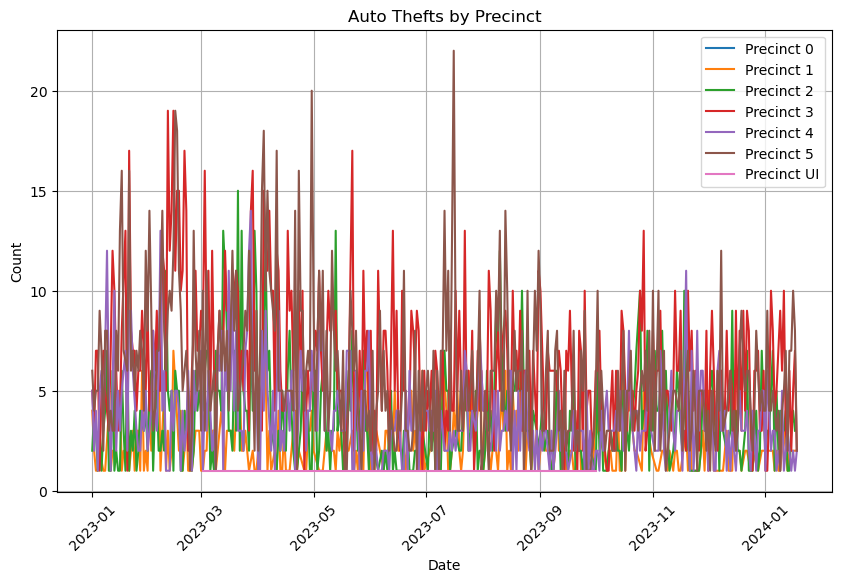

In [8]:
# Convert 'reportedDate' to datetime type
autoth_df['reportedDate'] = pd.to_datetime(autoth_df['reportedDate'])

# Group the data by precinct and date, and calculate the total count of auto thefts
precinct_df = autoth_df.groupby(['precinct', 'reportedDate']).size().reset_index(name='count')

# Get unique precincts
precincts = precinct_df['precinct'].unique()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create line charts for each precinct
for precinct in precincts:
    precinct_data = precinct_df[precinct_df['precinct'] == precinct]
    
    plt.plot(precinct_data['reportedDate'], precinct_data['count'], label=f'Precinct {precinct}')
    
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Auto Thefts by Precinct')

# Rotate the x-axis label
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Add gridlines to the plot
plt.grid(True)

# Show the plot
plt.show()

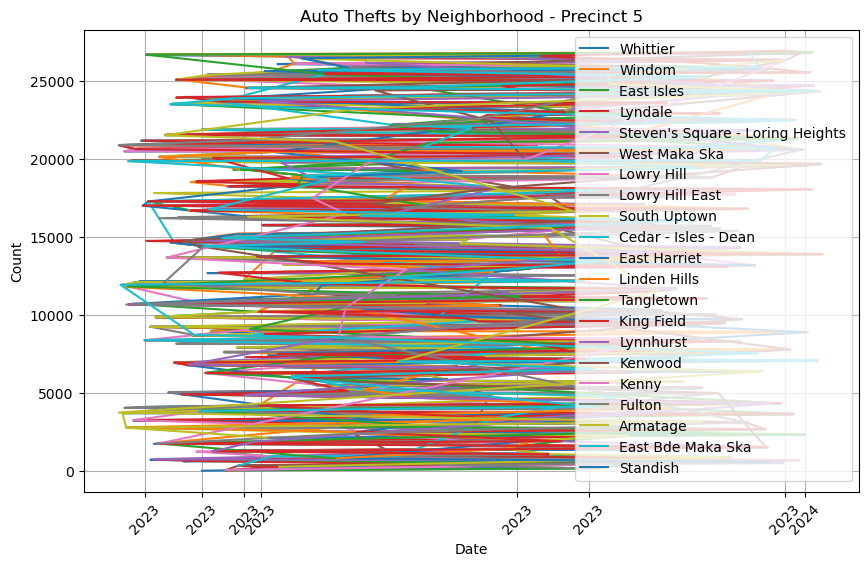

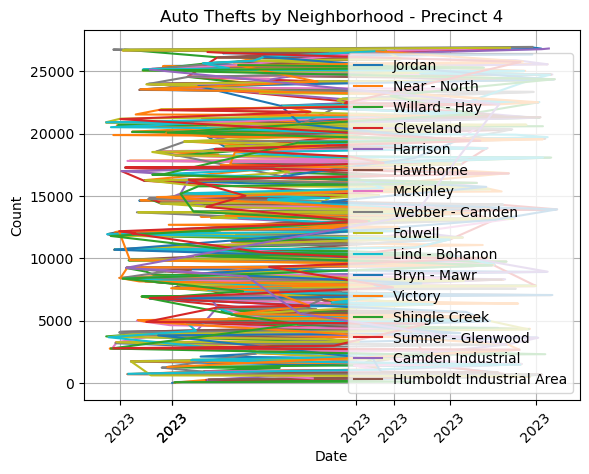

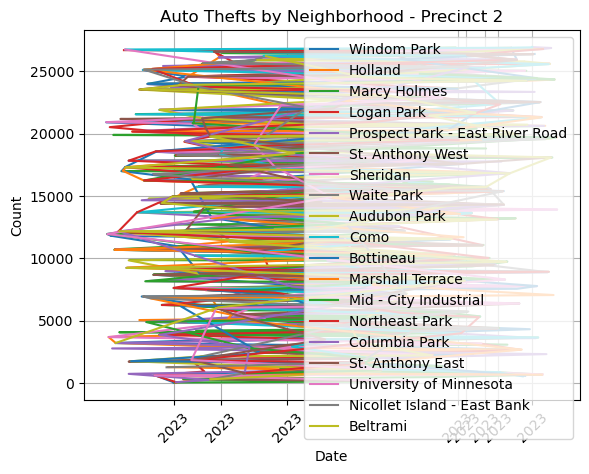

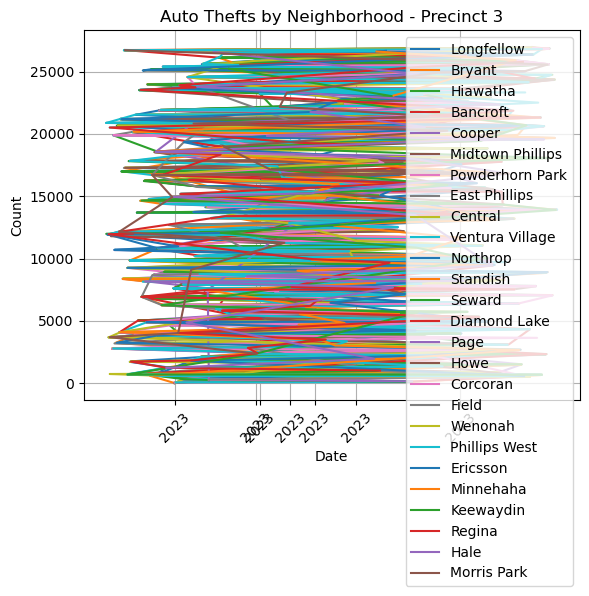

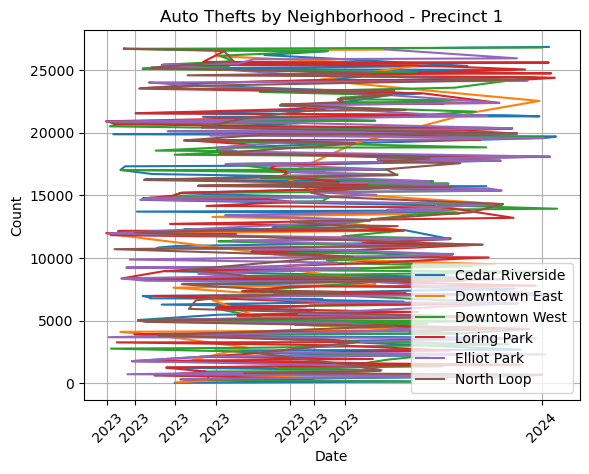

ValueError: slice step cannot be zero

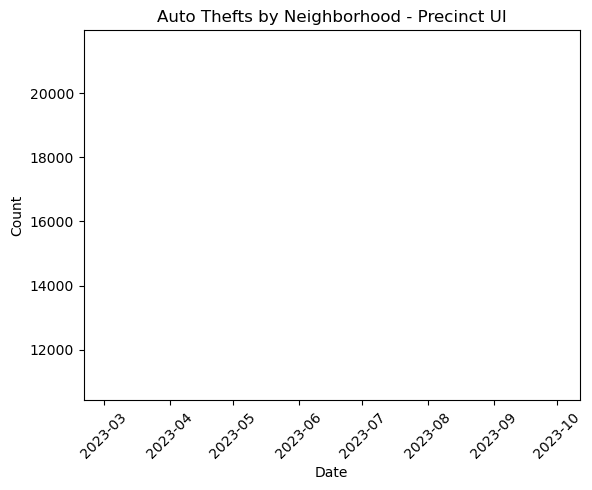

In [7]:
# Convert 'reportedDate' to datetime type
autoth_df['reportedDate'] = pd.to_datetime(autoth_df['reportedDate'])

# Get unique precincts
precincts = autoth_df['precinct'].unique()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create line charts for each precinct
for precinct in precincts:
    precinct_df = autoth_df[autoth_df['precinct'] == precinct]
    neighborhoods = precinct_df['neighborhood'].unique()
    
    for neighborhood in neighborhoods:
        neighborhood_data = precinct_df[precinct_df['neighborhood'] == neighborhood]
        plt.plot(neighborhood_data['reportedDate'], neighborhood_data['id'], label=neighborhood)
    
    # Add labels and title for each precinct
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Auto Thefts by Neighborhood - Precinct {precinct}')
    
    # Rotate the x-axis label
    plt.xticks(rotation=45)
    
    # Set the number of ticks to be displayed on the x-axis
    num_ticks = 7
    
    # Calculate the step size for selecting ticks
    step = len(precinct_df) // num_ticks
    
    # Select ticks based on the step size
    ticks = precinct_df['reportedDate'][::step]
    
    # Define custom labels for the x-axis
    custom_labels = [str(label.year) for label in ticks]
    
    # Set the custom labels on the x-axis
    plt.xticks(ticks, custom_labels)
    
    # Show the legend
    plt.legend()
    
    # Add gridlines to the plot
    plt.grid(True)
    
    # Show the plot
    plt.show()